# Plotting Jazayeri & Shadlen (2010) data

Code to reproduce the plot in their paper: https://www.nature.com/articles/nn.2590.pdf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
dat = pd.read_csv("hw2.csv")
dat.head()

,Subject,Cond,Trial,T_s,T_p,Main
0,0,One,0,1440.32,1440.32,Train
1,0,One,1,2152.74,2152.74,Train
2,0,One,2,1503.15,1503.15,Train
3,0,One,3,1594.56,1594.56,Train
4,0,One,4,2323.75,2323.75,Train


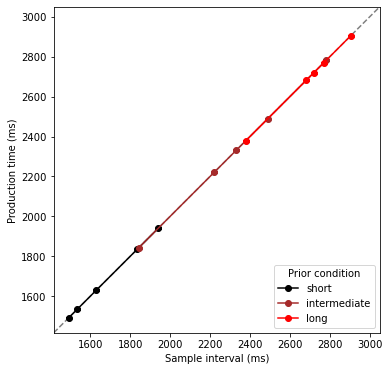

In [25]:
# Remove training trials
dat = dat[dat['Main'] == "Test"]

# Calculate mean Tp by condition
mean_tp = dat.groupby(['Cond', 'T_s'])['T_p'].mean().reset_index()

yrange = np.multiply((min(mean_tp['T_s']), max(mean_tp['T_s'])), [0.95, 1.05])

cond1 = mean_tp.loc[mean_tp['Cond'] == "One"]
cond2 = mean_tp.loc[mean_tp['Cond'] == "Two"]
cond3 = mean_tp.loc[mean_tp['Cond'] == "Three"]

# Add jitter noise
jitter = dat.copy()
jitter['T_s'] = jitter['T_s'] + np.random.uniform(-5, 5, len(dat))
cond1_jitter = jitter.loc[jitter['Cond'] == "One"]
cond2_jitter = jitter.loc[jitter['Cond'] == "Two"]
cond3_jitter = jitter.loc[jitter['Cond'] == "Three"]

# Make plot
f, ax = plt.subplots(figsize = (6,6))

ax.set(xlim = yrange, ylim = yrange)
f.gca().set_aspect('equal', adjustable = 'box')

ax.set_xlabel('Sample interval (ms)')
ax.set_ylabel('Production time (ms)')

ax.plot(yrange, yrange, linestyle = '--', color ='gray')

ax.scatter(cond1_jitter['T_s'], cond1_jitter['T_p'], marker = '.', color = 'black', alpha = 0.025, label = None)
ax.scatter(cond2_jitter['T_s'], cond2_jitter['T_p'], marker = '.', color = 'brown', alpha = 0.025, label = None)
ax.scatter(cond3_jitter['T_s'], cond3_jitter['T_p'], marker = '.', color = 'red', alpha = 0.025, label = None)

ax.plot(cond1['T_s'], cond1['T_p'], color = 'black', marker = 'o', label = "short")
ax.plot(cond2['T_s'], cond2['T_p'], color = 'brown', marker = 'o', label = "intermediate")
ax.plot(cond3['T_s'], cond3['T_p'], color = 'red', marker = 'o', label = "long")

ax.legend(title = 'Prior condition', loc = 4)

In [17]:
cond1_jitter

,Subject,Cond,Trial,T_s,T_p,Main,Ts
500,0,One,500,1835.75,1835.75,Test,1839.821563
501,0,One,501,1835.75,1835.75,Test,1833.211046
502,0,One,502,1835.75,1835.75,Test,1839.977736
503,0,One,503,1835.75,1835.75,Test,1837.525492
504,0,One,504,1835.75,1835.75,Test,1833.389685
...,...,...,...,...,...,...,...
7495,4,One,7495,1941.16,1941.16,Test,1943.308178
7496,4,One,7496,1941.16,1941.16,Test,1946.093481
7497,4,One,7497,1941.16,1941.16,Test,1942.655896
7498,4,One,7498,1941.16,1941.16,Test,1939.632091


In [8]:
# Remove training trials
dat = dat[dat['Main'] == "Test"]

# Calculate mean Tp by condition
mean_tp = dat.groupby(['Cond', 'T_s'])['T_p'].mean().reset_index()


yrange = np.multiply((min(mean_tp['T_s']), max(mean_tp['T_s'])), [0.95, 1.05])

# Subset data for plotting

cond1 = mean_tp.loc[mean_tp['Cond'] == "One"]
cond2 = mean_tp.loc[mean_tp['Cond'] == "Two"]
cond3 = mean_tp.loc[mean_tp['Cond'] == "Three"]

# Add jitter noise
jitter = dat.copy()
jitter['Ts'] = jitter['T_s'] + np.random.uniform(-5, 5, len(dat))
cond1_jitter = jitter.loc[jitter['Cond'] == "One"]
cond2_jitter = jitter.loc[jitter['Cond'] == "Two"]
cond3_jitter = jitter.loc[jitter['Cond'] == "Three"]

# Make plot
f, ax = plt.subplots(figsize = (6,6))

ax.set(xlim = yrange, ylim = yrange)
f.gca().set_aspect('equal', adjustable = 'box')

ax.set_xlabel('Sample interval (ms)')
ax.set_ylabel('Production time (ms)')

ax.plot(yrange, yrange, linestyle = '--', color ='gray')

ax.scatter(cond1_jitter['T_s'], cond1_jitter['T_p'], marker = '.', color = 'black', alpha = 0.025, label = None)
ax.scatter(cond2_jitter['T_s'], cond2_jitter['Tp'], marker = '.', color = 'brown', alpha = 0.025, label = None)
ax.scatter(cond3_jitter['T_s'], cond3_jitter['T_p'], marker = '.', color = 'red', alpha = 0.025, label = None)

ax.plot(cond1['T_s'], cond1['T_p'], color = 'black', marker = 'o', label = "short")
ax.plot(cond2['T_s'], cond2['T_p'], color = 'brown', marker = 'o', label = "intermediate")
ax.plot(cond3['T_s'], cond3['T_p'], color = 'red', marker = 'o', label = "long")

ax.legend(title = 'Prior condition', loc = 4)

ValueError: min() arg is an empty sequence

In [6]:
dat

,Subj,Cond,line,Trial,Ts,Tp,MaxTrial,Main
990,1,1,991,991,705.84,773.69,1489,True
991,1,1,992,992,529.38,577.32,1489,True
992,1,1,993,993,705.84,583.60,1489,True
993,1,1,994,994,599.96,632.58,1489,True
994,1,1,995,995,811.72,811.91,1489,True
...,...,...,...,...,...,...,...,...
19253,6,3,19254,995,1129.30,1170.20,999,True
19254,6,3,19255,996,917.59,916.06,999,True
19255,6,3,19256,997,952.88,966.52,999,True
19256,6,3,19257,998,988.18,953.85,999,True
